In [1]:
# LOGISTIC REGRESSION 

In [2]:
# USED FOR CLASSIFICATION PROBLEMS

In [3]:
# TRUE OR FALSE,0 OR 1 ,CANCER PRESENT OR NOT,LOAN PAYED OR NOT

In [4]:
# THE SIGMOID FUNCTION IS RESPONSIBLE HERE, IT TAKES ANY VALUE AND OUTPUTS IT BE BETWEEN 0 AND 1

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
train = pd.read_csv('titanic_train.csv')

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

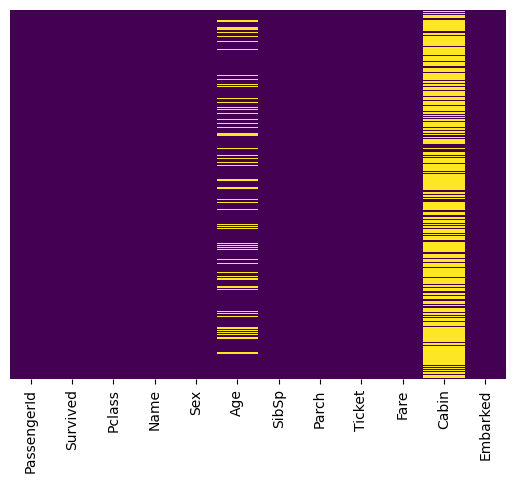

In [17]:
sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap = 'viridis')
# y tick labels is y index

In [18]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

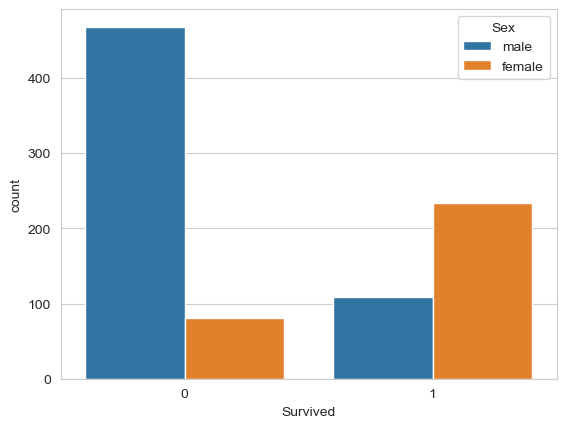

In [21]:
sns.countplot(x='Survived',hue = 'Sex',data=train)

<Axes: xlabel='Survived', ylabel='count'>

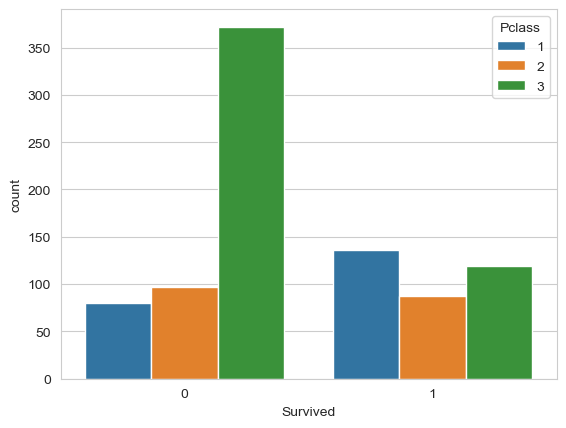

In [22]:
sns.countplot(x='Survived',hue = 'Pclass',data=train)

C:\Users\Aryan\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


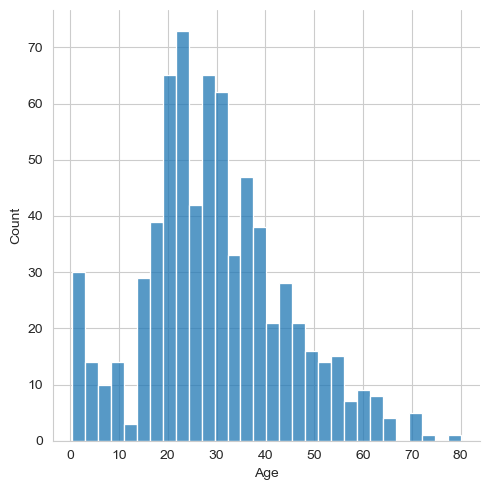

In [23]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

<Axes: ylabel='Frequency'>

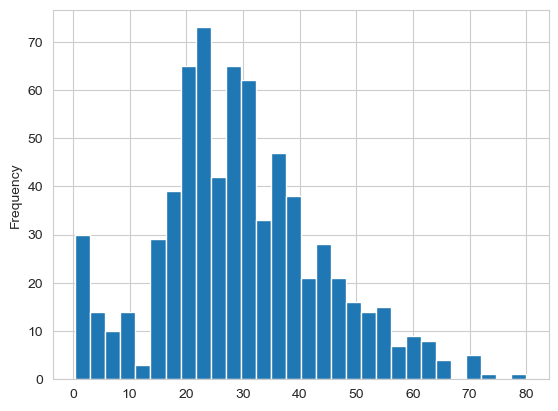

In [24]:
train['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

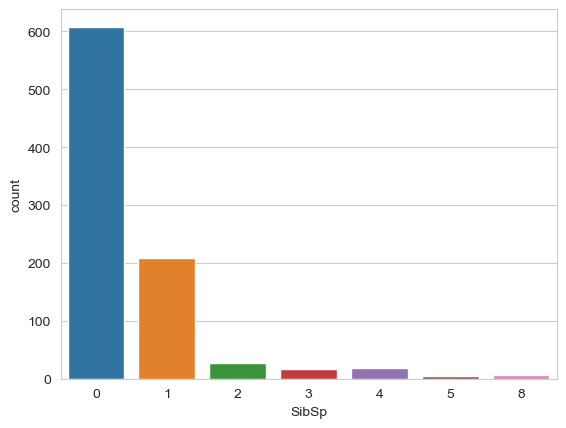

In [25]:
sns.countplot(x='SibSp',data=train)

<Axes: >

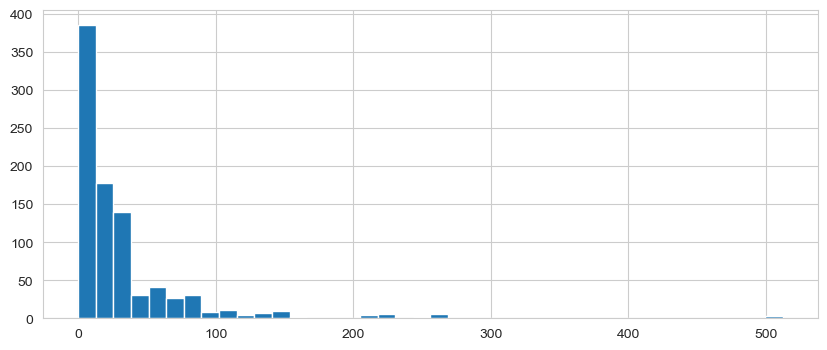

In [28]:
train['Fare'].hist(bins=40,figsize = (10,4))

In [29]:
# cufflinks plot
import cufflinks as cf
cf.go_offline()

In [30]:
train['Fare'].iplot(kind='hist',bins=40)

In [32]:
# PART 2 - CLEANING OUR DATA

<Axes: xlabel='Pclass', ylabel='Age'>

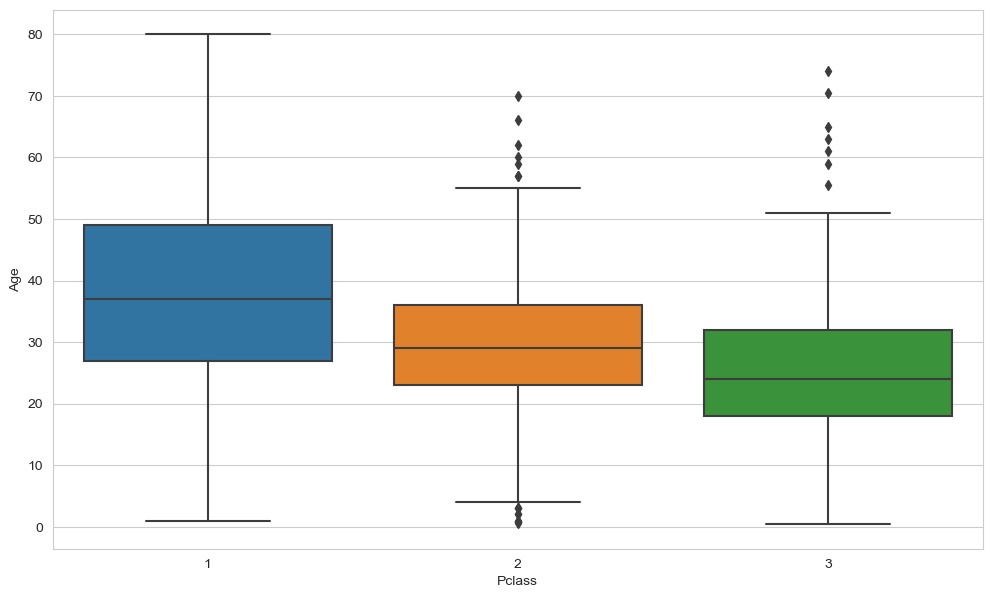

In [36]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [37]:
# filling the missing ages with the average age

In [38]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [39]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

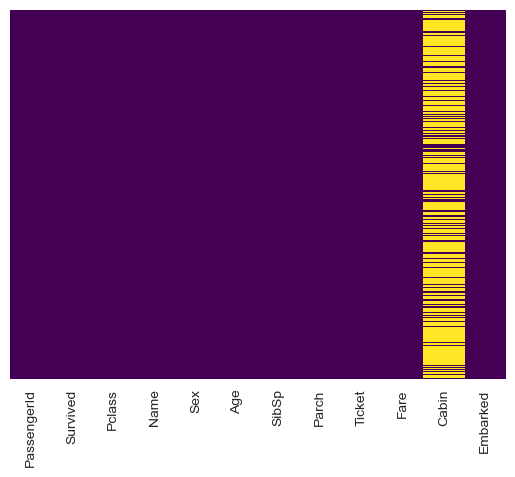

In [41]:
sns.heatmap(train.isnull(),yticklabels = False,cbar = False,cmap='viridis')

In [50]:
# droping cabin column as it contains a lot of missing values

In [ ]:
train.drop('Cabin',axis = 1,inplace = True)

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

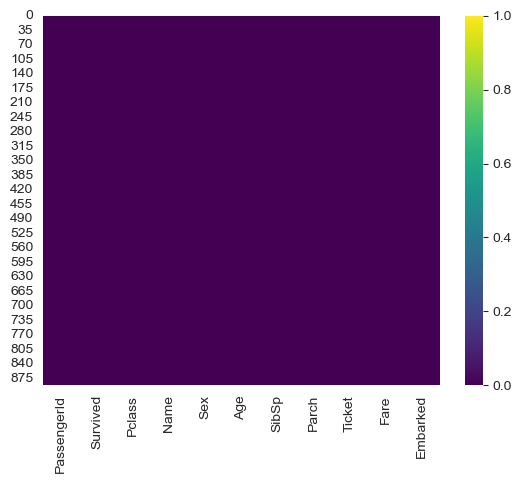

In [52]:
sns.heatmap(train.isnull(),cmap='viridis')

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
# dummy variable to convert categorical data into understandable to machine data

In [57]:
sex = pd.get_dummies(train['Sex'],drop_first = True)

In [58]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [59]:
embark = pd.get_dummies(train['Embarked'],drop_first = True)

In [61]:
train = pd.concat([train,sex,embark],axis=1)

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [64]:
# drop columns whic we wont use
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace = True)

In [66]:
train.drop('PassengerId',axis = 1,inplace = True)

In [67]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [72]:
for i in range(len(train)):
    if train.loc[i,'male'] == True:
        train.loc[i,'male'] = 1
    else:
        train.loc[i,'male'] = 0

In [73]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,False,True
1,1,1,38.0,1,0,71.2833,0,False,False
2,1,3,26.0,0,0,7.9250,0,False,True
3,1,1,35.0,1,0,53.1000,0,False,True
4,0,3,35.0,0,0,8.0500,1,False,True


In [82]:
 # PART 3

In [83]:
X =train.drop('Survived',axis=1)
Y = train['Survived']

In [84]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state = 101)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
logmodel = LogisticRegression()

In [95]:
logmodel.fit(X_train,Y_train)

C:\Users\Aryan\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [97]:
predictions = logmodel.predict(X_test)

In [98]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       169
           1       0.81      0.69      0.75       126

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.79       295
weighted avg       0.80      0.80      0.80       295



In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
confusion_matrix(Y_test,predictions)

array([[149,  20],
       [ 39,  87]], dtype=int64)